Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = ""
COLLABORATORS = ""

---

In order to successfully complete this assignment you must do the required reading, watch the provided videos and complete all instructions.  The embedded Google form must be entirely filled out and submitted on or before **11:59pm on Wednesday October 16**.  Students must come to class the next day prepared to discuss the material covered in this assignment. answer

# Pre-Class Assignment: Projections

# Goals for today's pre-class assignment 
**Read Section 4.6 of the textbook.**
</p>

1. [Orthogonal and Orthonormal](#T1)
1. [Code Review](#T2)
1. [Gram-Schmidt](#T3)
1. [Assignment Wrap-up](#T4)

----
<a name="T1"></a>
# 1. Orthogonal and Orthonormal

**Definition:** A set of vectors is said to be **orthogonal** if every pair of vectors in the set is orthogonal (the dot product is 0). 
The set is **orthonormal** if it is orthogonal and each vector is a unit vector (norm equals 1). 

**Result:** An orthogonal set of nonzero vectors is linearly independent.

**Definition:** A basis that is an orthogonal set is called an orthogonal basis.
A basis that is an orthonormal set is called an orthonormal basis.

**Result:** Let $\{u_1,\dots,u_n\}$ be an orthonormal basis for a vector space $V$. 
Then for any vector $v$ in $V$, we have 
$$v=(v\cdot u_1)u_1+(v\cdot u_2)u_2 +\dots + (v\cdot u_n)u_n$$

**Definition:** A *square* matrix is **orthogonal** is $A^{-1}=A^\top$.

**Result:** Let $A$ be a square matrix. The following three statements are equivalent.

(a) $A$ is orthogonal. 

(b) The column vectors of $A$ form an orthonormal set. 

(c) The row vectors of $A$ form an orthonormal set.

(d) $A^{-1}$ is orthogonal. 

(e) $A^\top$ is orthogonal.

**Result:** If $A$ is an orthogonal matrix, then we have $|A|=\pm 1$.

Consider the following vectors $u_1, u_2$, and $u_3$ that form a basis for $R^3$. 

$$ u_1 = (1,0,0)$$
$$ u_2 = (0, \frac{1}{\sqrt(2)}, \frac{1}{\sqrt(2)})$$
$$ u_3 = (0, \frac{1}{\sqrt(2)}, -\frac{1}{\sqrt(2)})$$

&#9989; <font color=red>**DO THIS:**</font>  Show that the vectors $u_1$, $u_2$, and $u_3$ are linearly independent (**HINT:** see the pre-class for module 11-Change_Basis):

In [2]:
import numpy as np
import math

u_matrix = np.matrix([[1,0,0],[0,1/math.sqrt(2),1/math.sqrt(2)],[0,1/math.sqrt(2),-1/math.sqrt(2)]])
np.linalg.inv(u_matrix)

matrix([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.70710678,  0.70710678],
        [-0.        ,  0.70710678, -0.70710678]])

&#9989; <font color=red>**QUESTION 1:**</font> How do you show that $u_1$, $u_2$, and $u_3$ are orthogonal?

In [3]:
u_matrix.T

matrix([[ 1.        ,  0.        ,  0.        ],
        [ 0.        ,  0.70710678,  0.70710678],
        [ 0.        ,  0.70710678, -0.70710678]])

The inverse and the transpose are the same, so it is orthogonal.

&#9989; <font color=red>**QUESTION 2:**</font> How do you show that $u_1$, $u_2$, and $u_3$ are normal vectors?

In [4]:
print(np.linalg.norm([1,0,0]), np.linalg.norm([0,1/math.sqrt(2),1/math.sqrt(2)]), np.linalg.norm([0,1/math.sqrt(2),-1/math.sqrt(2)]))

1.0 0.9999999999999999 0.9999999999999999


The vectors are normal because each of them has a length of 1

&#9989; <font color=red>**DO THIS:**</font>  Express the vector $v = (7,5,-1)$ as a linear combination of the $u_1$, $u_2$, and $u_3$ basis vectors:

In [5]:
u1 = np.array([1,0,0])
u2 = np.array([0,1/math.sqrt(2),1/math.sqrt(2)])
u3 = np.array([0,1/math.sqrt(2),-1/math.sqrt(2)])

v = np.array([7,5,-1])

a = np.dot(v,u1)
b = np.dot(v,u2)
c = np.dot(v,u3)
print(a,b,c)

7 2.82842712474619 4.242640687119285


v = 7\*u1 + 2.828\*u2 + 4.243\*u3

----
<a name="T2"></a>
# 2. Code Review

In the next in-class assignment, we are going to avoid some of the more advanced libraries ((i.e. no ```numpy``` or ```scipy``` or ```sympy```) to try to get a better understanding about what is going on in the math. 
The following code implements some common linear algebra functions:

In [6]:
#Standard Python Libraries only
import math
import copy

In [7]:
def dot(u,v):
    '''Calculate the dot product between vectors u and v'''
    temp = 0;
    for i in range(len(u)):
        temp += u[i]*v[i]
    return temp

&#9989; <font color=red>**DO THIS:**</font> Write a quick test to compare the output of the above ```dot``` function with the ```numpy``` dot function.

In [8]:
# Put your test code here
v1 = [1,4]
v2 = [4,5]

print(dot(v1,v2))
print(np.dot(v1,v2))

24
24


In [9]:
def multiply(m1,m2):
    '''Calculate the matrix multiplication between m1 and m2 represented as list-of-list.'''
    n = len(m1)
    d = len(m2)
    m = len(m2[0])
    
    if len(m1[0]) != d:
        print("ERROR - inner dimentions not equal")
    
    #make zero matrix
    result = [[0 for j in range(m)] for i in range(n)]
#    print(result)
    for i in range(0,n):
        for j in range(0,m):
            for k in range(0,d):
                #print(i,j,k)
                #print('result', result[i][j])
                #print('m1', m1[i][k])
                #print('m2', m2[k][j])
                result[i][j] = result[i][j] + m1[i][k] * m2[k][j]
    return result


&#9989; <font color=red>**DO THIS:**</font> Write a quick test to compare the output of the above ```multiply``` function with the ```numpy``` multiply function.

In [10]:
# Put your test code here
m1 = [[1,4,7],[4,2,5],[2,5,3]]
m2 = [[3,6,2],[4,6,2],[4,2,7]]

print(multiply(m1,m2))
print(np.matmul(m1,m2))

[[47, 44, 59], [40, 46, 47], [38, 48, 35]]
[[47 44 59]
 [40 46 47]
 [38 48 35]]


&#9989; <font color=red>**QUESTION 3:**</font> What is the big-O complexity of the above ```multiply``` function?

$O(n^3)$

&#9989; <font color=red>**QUESTION 4:**</font> Line 11 in the provided ```multiply``` code initializes a matrix of the size of the output matrix as a list of lists with zeros. What is the big-O complexity of line 11?

O(n^2)

In [11]:
def norm(u):
    '''Calculate the norm of vector u'''
    nm = 0
    for i in range(len(u)):
        nm += u[i]*u[i]
    return math.sqrt(nm)

&#9989; <font color=red>**DO THIS:**</font> Write a quick test to compare the outputs of the above ```norm``` function with the ```numpy``` norm function.

In [12]:
#Put your test code here
test_norm = [4,2]

print(norm(test_norm))
print(np.linalg.norm(test_norm))

4.47213595499958
4.47213595499958


In [13]:
def transpose(A):
    '''Calculate the transpose of matrix A represented as list of lists'''
    n = len(A)
    m = len(A[0])
    AT = list()
    for j in range(0,m):    
        temp = list()
        for i in range(0,n):
            temp.append(A[i][j])
        AT.append(temp)
    return AT

&#9989; <font color=red>**DO THIS:**</font> Write a quick test to compare the output of the above ```transpose``` function with the ```numpy``` transpose function.

In [14]:
# Put your test code here
matrix_t = [[4,5,2],[7,3,2],[5,4,2]]
print(transpose(matrix_t))
print(np.transpose(matrix_t))


[[4, 7, 5], [5, 3, 4], [2, 2, 2]]
[[4 7 5]
 [5 3 4]
 [2 2 2]]


&#9989; <font color=red>**QUESTION 5:**</font> What is the big-O complexity of the above ```transpose``` function?

O(n^2)

&#9989; <font color=red>**QUESTION 6:**</font> Explain any differences in results between the provided functions and their ```numpy``` counterparts. 

numpy has a different way of printing the answers because they return their own data structure I think, also they have more optimized algorithms for calculating stuff

----
<a name="T3"></a>
# 3. Gram-Schmidt


Watch this video for the indroduction of Gram-Schmidt, which we will implement in class.

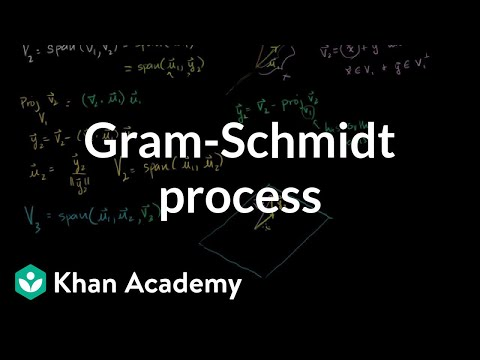

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo("rHonltF77zI",width=640,height=360)

----

<a name="T4"></a>
# 4. Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

[Direct Link to Google Form](https://cmse.msu.edu/cmse314-pc-survey)


If you have trouble with the embedded form, please make sure you log on with your MSU google account at [googleapps.msu.edu](https://googleapps.msu.edu) and then click on the direct link above.

&#9989; <font color=red>**Assignment-Specific QUESTION:**</font> There is no Assignment specific question for this notebook. You can just say "none".

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Summarize what you did in this assignment.

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What questions do you have, if any, about any of the topics discussed in this assignment after working through the jupyter notebook?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  How well do you feel this assignment helped you to achieve a better understanding of the above mentioned topic(s)?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **most** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> What was the **least** challenging part of this assignment for you? 

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  What kind of additional questions or support, if any, do you feel you need to have a better understanding of the content in this assignment?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font>  Do you have any further questions or comments about this material, or anything else that's going on in class?

Put your answer to the above question here

&#9989; <font color=red>**QUESTION:**</font> Approximately how long did this pre-class assignment take?

Put your answer to the above question here

In [16]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse314-pc-survey" 
	width="100%" 
	height="1000px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---------
### Congratulations, we're done!

To get credit for this assignment you must fill out and submit the above Google From on or before the assignment due date.

### Course Resources:

- [Syllabus](https://docs.google.com/document/d/e/2PACX-1vRAFflQFXulzSMwWcyr_SEd6piEzHLWTjGkwx49D6H6FZxQGWEHrKMDiIaV3Pu6adAQ-wjlg3IXptjM/pub)
- [Preliminary Schedule](https://docs.google.com/spreadsheets/d/e/2PACX-1vS5UoXTmHDnF99kTHOiHIWuOBG7iqts-8EsbpoJHayRTB7F8eI4SfMR0MVp7dt0RQrMkNTVW6M1x-wY/pubhtml)
- [Course D2L Page](https://d2l.msu.edu/d2l/home/832635)

&#169; Copyright 2019,  Michigan State University Board of Trustees